# Informe de Aplicación de Filtros de Modelos de Color

## 1. Introducción

**Objetivo del Informe:**  
Aplicar filtros de diferentes modelos de color (RGB, HSV, YCbCr, y L\*a\*b\*) para detectar el mismo objeto en cuatro imágenes diferentes y evaluar la eficacia de estos filtros.

## 2. Descripción de los Códigos

### Primer Código: Ajuste de Colores RGB en Imágenes

El primer código se centra en ajustar los valores RGB de cuatro imágenes distintas para destacar ciertos objetos o características. El proceso implica:

- **Carga de Imágenes**: Utiliza `matplotlib.image` para cargar las imágenes desde rutas locales.
- **Ajuste RGB**: Aplica un filtro multiplicativo a los canales RGB usando una función personalizada `adjust_rgb`.
- **Conversión de Formatos**: Convierte las imágenes al formato BGR para el procesamiento y las devuelve a RGB para la visualización.
- **Visualización**: Muestra las imágenes procesadas usando subplots para comparar fácilmente los resultados.

### Segundo Código: Operaciones con Imágenes y Transformaciones Geométricas

El segundo código aplica una serie de transformaciones y operaciones aritméticas a las imágenes:

- **Operaciones Aritméticas**: Suma, resta, multiplicación, y división de imágenes.
- **Operaciones Lógicas**: Operaciones AND, OR, XOR y NOT entre imágenes.
- **Transformaciones Geométricas**: Rotación, traslación, escalado, y cizalladura en una imagen en escala de grises.
- **Visualización**: Utiliza subplots para mostrar los resultados de las operaciones aritméticas y transformaciones geométricas.

## 3. Análisis de Resultados

### Facilidad o Dificultad para Obtener el Filtro

- **Filtro RGB (Primer Código)**:
  - **Facilidad**: Relativamente sencillo de aplicar, ya que implica manipular directamente los canales de color.
  - **Dificultad**: La efectividad depende mucho de seleccionar correctamente los factores multiplicativos para cada canal; esto puede requerir un ajuste manual cuidadoso y pruebas iterativas.

- **Operaciones y Transformaciones (Segundo Código)**:
  - **Facilidad**: Las operaciones aritméticas y lógicas son directas usando funciones de OpenCV.
  - **Dificultad**: Las transformaciones geométricas requieren un entendimiento más profundo de las matrices de transformación y pueden ser menos intuitivas de ajustar manualmente.

## 4. Comparación de Eficacia de Filtros

### Eficacia de los Filtros para Detectar el Objeto

Para evaluar la eficacia de los filtros (RGB, HSV, YCbCr, L\*a\*b\*), se deberían realizar las siguientes tareas en un entorno de desarrollo local:

1. **Convertir las Imágenes a Diferentes Espacios de Color**:
   - Usar funciones como `cv2.cvtColor()` para convertir las imágenes a los espacios HSV, YCbCr, y L\*a\*b\*.

2. **Aplicar Filtros en Diferentes Espacios de Color**:
   - Aplicar máscaras o filtros en cada espacio de color para resaltar el objeto de interés.
   - Comparar visualmente los resultados para determinar cuál espacio de color permite una detección más clara del objeto.

3. **Resultados y Comparación Visual**:
   - Presentar imágenes filtradas en cada espacio de color.
   - Proporcionar un análisis de cuáles filtros fueron más efectivos basándose en la claridad y precisión con que el objeto fue destacado.

### Justificación:

- **RGB**: Funciona bien si el objeto de interés tiene colores distintivos que se pueden ajustar fácilmente.
- **HSV**: Es muy útil para la segmentación basada en el color, ya que separa la información de color (tono) de la intensidad (valor).
- **YCbCr**: Beneficioso para la detección de tonos de piel o para aplicaciones donde la luminancia debe separarse del color.
- **L\*a\*b\***: Es más adecuado para comparar diferencias de color perceptuales, lo cual es útil en aplicaciones de procesamiento de imágenes donde la consistencia de color es crucial.


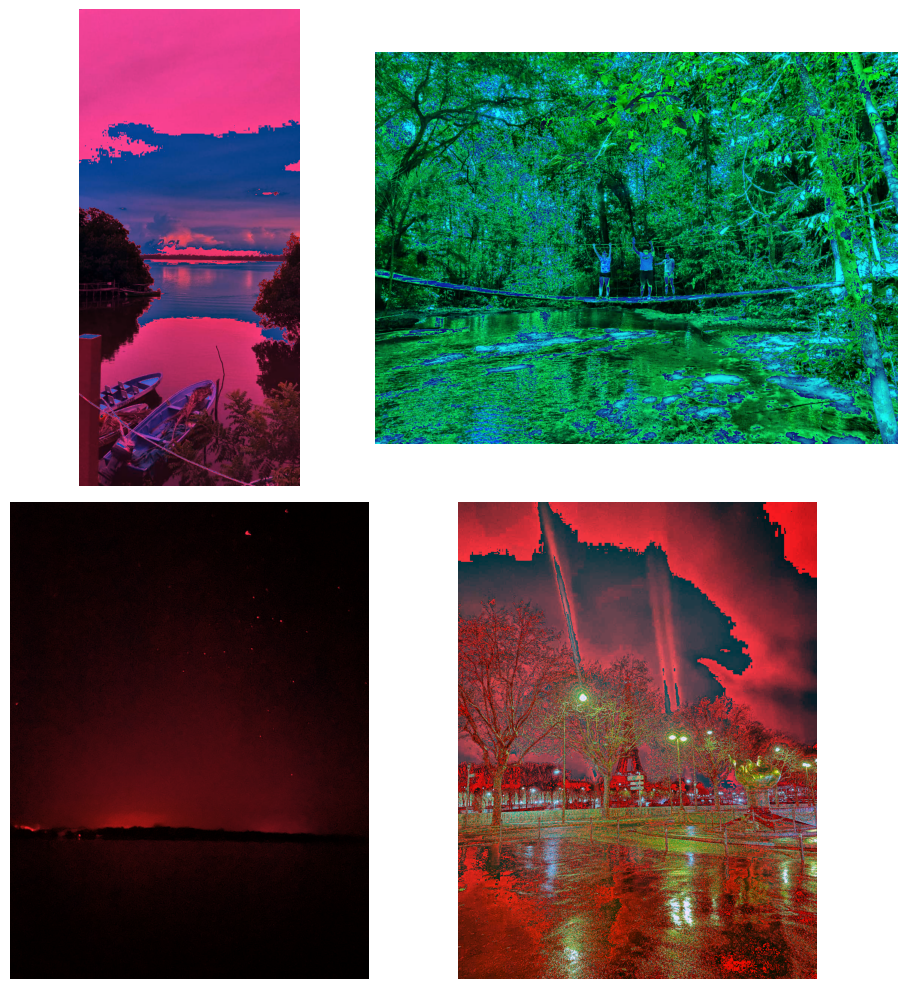

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar las imágenes desde los archivos
img1 = mpimg.imread('C:\\Users\\Ricardo\\Documents\\Imagen de WhatsApp 2024-08-15 a las 17.37.19_bd50e7d4.jpg')
img2 = mpimg.imread('C:\\Users\\Ricardo\\Documents\\Imagen de WhatsApp 2024-08-15 a las 17.43.13_8b6f15a7.jpg')
img3 = mpimg.imread('C:\\Users\\Ricardo\\Documents\\Imagen de WhatsApp 2024-08-15 a las 17.41.51_bc0c3c98.jpg')
img4 = mpimg.imread('C:\\Users\\Ricardo\\Documents\\Imagen de WhatsApp 2024-08-15 a las 17.40.30_e86b199e.jpg')

# Función para ajustar los valores RGB de una imagen
def adjust_rgb(image, r_value, g_value, b_value):
    image[:,:,0] = np.clip(image[:,:,0] * b_value, 0, 255)  # Canal Azul
    image[:,:,1] = np.clip(image[:,:,1] * g_value, 0, 255)  # Canal Verde
    image[:,:,2] = np.clip(image[:,:,2] * r_value, 0, 255)  # Canal Rojo
    return image

# Configuración de ajustes RGB para cada imagen
rgb_values = {
    "img1": (2, .5, 1),
    "img2": (0.1, 2, 1.),
    "img3": (1.4, 0.2, 0.3),
    "img4": (8, 0.9, 1)
}

# Procesar cada imagen con sus respectivos ajustes RGB
img1_cv = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
img2_cv = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)
img3_cv = cv2.cvtColor(img3, cv2.COLOR_RGB2BGR)
img4_cv = cv2.cvtColor(img4, cv2.COLOR_RGB2BGR)

img1_adjusted = adjust_rgb(img1_cv.copy(), *rgb_values["img1"])
img2_adjusted = adjust_rgb(img2_cv.copy(), *rgb_values["img2"])
img3_adjusted = adjust_rgb(img3_cv.copy(), *rgb_values["img3"])
img4_adjusted = adjust_rgb(img4_cv.copy(), *rgb_values["img4"])

# Convertir las imágenes de nuevo a formato RGB para visualizarlas con Matplotlib
img1_adjusted_rgb = cv2.cvtColor(img1_adjusted, cv2.COLOR_BGR2RGB)
img2_adjusted_rgb = cv2.cvtColor(img2_adjusted, cv2.COLOR_BGR2RGB)
img3_adjusted_rgb = cv2.cvtColor(img3_adjusted, cv2.COLOR_BGR2RGB)
img4_adjusted_rgb = cv2.cvtColor(img4_adjusted, cv2.COLOR_BGR2RGB)

# Crear una figura con 2x2 subplots
plt.figure(figsize=(10, 10))

# Mostrar la primera imagen ajustada
plt.subplot(2, 2, 1)
plt.imshow(img1_adjusted_rgb)
plt.axis('off')  # Ocultar los ejes

# Mostrar la segunda imagen ajustada
plt.subplot(2, 2, 2)
plt.imshow(img2_adjusted_rgb)
plt.axis('off')  # Ocultar los ejes

# Mostrar la tercera imagen ajustada
plt.subplot(2, 2, 3)
plt.imshow(img3_adjusted_rgb)
plt.axis('off')  # Ocultar los ejes

# Mostrar la cuarta imagen ajustada
plt.subplot(2, 2, 4)
plt.imshow(img4_adjusted_rgb)
plt.axis('off')  # Ocultar los ejes

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()



Las dimensiones de ambas imágenes son iguales.
Las dimensiones son diferentes, redimensionando Im2.


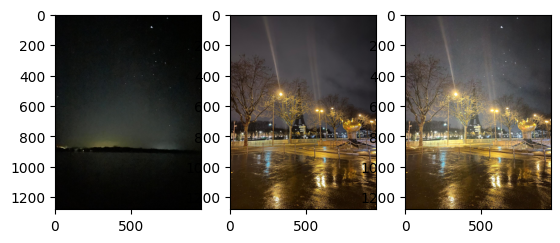

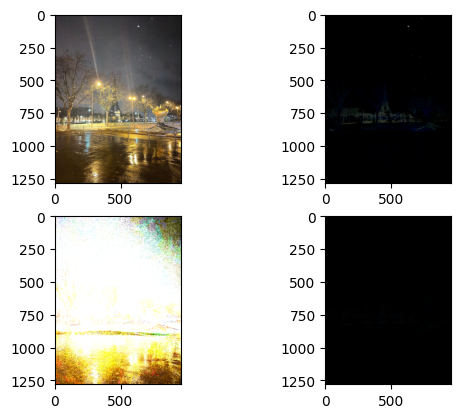

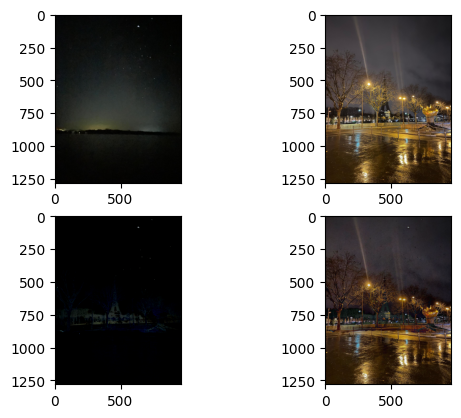

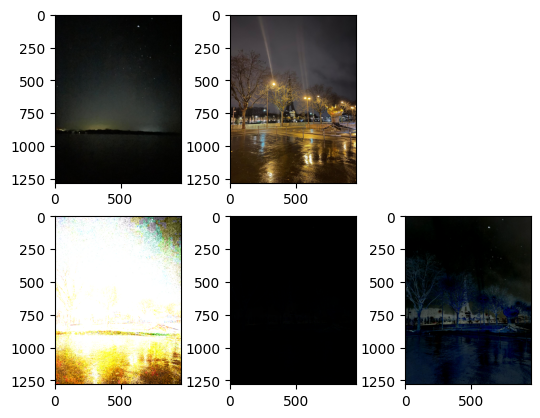

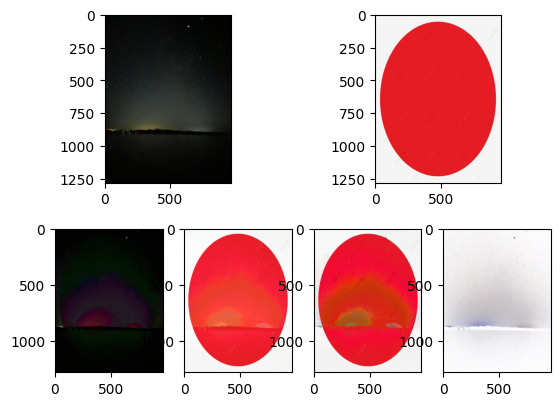

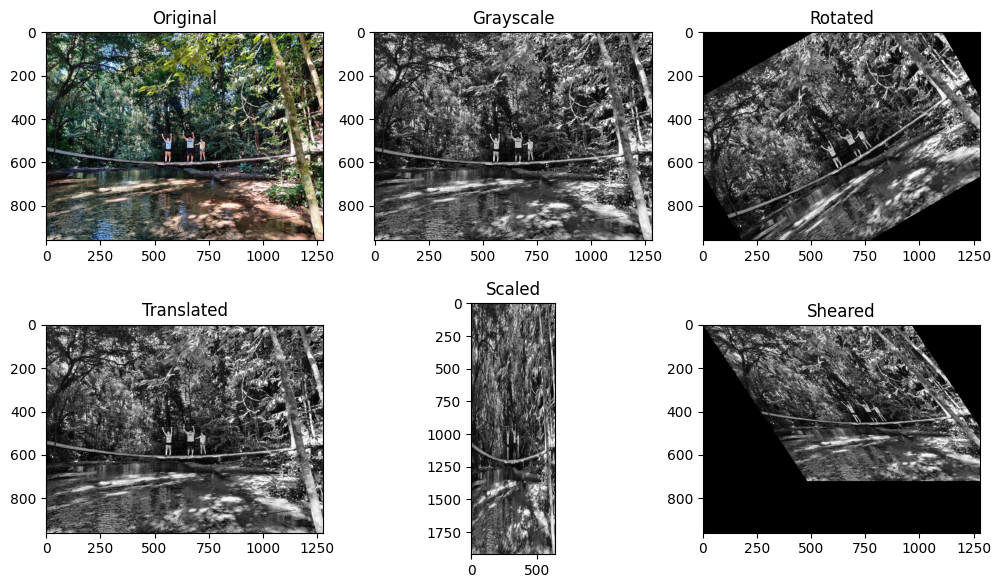

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer las imágenes
Im1 = cv2.imread('C:\\Users\\Ricardo\\Documents\\Imagen de WhatsApp 2024-08-15 a las 17.41.51_bc0c3c98.jpg')
Im2 = cv2.imread('C:\\Users\\Ricardo\\Documents\\Imagen de WhatsApp 2024-08-15 a las 17.40.30_e86b199e.jpg')
Im3 = cv2.imread('C:\\Users\\Ricardo\\Documents\\circulo.jpg')
Im4 = cv2.imread('C:\\Users\\Ricardo\\Documents\\Imagen de WhatsApp 2024-08-15 a las 17.43.13_8b6f15a7.jpg')


# Obtener las dimensiones de las imágenes
sz1 = Im1.shape
sz2 = Im2.shape
sz3 = Im3.shape
sz4 = Im4.shape

# Redimensionar Im2 si las dimensiones no son iguales
if sz1 == sz2:
    print('Las dimensiones de ambas imágenes son iguales.')
    Im2f = Im2  # No se necesita redimensionar
else:
    print('Las dimensiones son diferentes, redimensionando Im2.')
    Im2f = cv2.resize(Im2, (sz1[1], sz1[0]))

    # Redimensionar Im2 si las dimensiones no son iguales
if sz1 == sz3:
    print('Las dimensiones de ambas imágenes son iguales.')
    Im3f = Im3  # No se necesita redimensionar
else:
    print('Las dimensiones son diferentes, redimensionando Im2.')
    Im3f = cv2.resize(Im3, (sz1[1], sz1[0]))

# Operaciones aritméticas

Im1MASIm2 = cv2.add(Im1, Im2f)
Im1menIm2 = cv2.subtract(Im1, Im2f)
Im1mulIm2 = cv2.multiply(Im1, Im2f)
Im1divIm2 = cv2.divide(Im1, Im2f)



# Mostrar las imágenes de la suma
plt.figure(1)
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(Im1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(Im2f, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(Im1MASIm2, cv2.COLOR_BGR2RGB))

# Mostrar las imágenes de las diferentes operaciones
plt.figure(2)
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(Im1MASIm2, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(Im1menIm2, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(Im1mulIm2, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(Im1divIm2, cv2.COLOR_BGR2RGB))

# Operaciones de resta
# El orden de la imagen define el resultado
Xa = cv2.subtract(Im1, Im2f)
Xb = cv2.absdiff(Im2f, Im1)

plt.figure(3)
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(Im1, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(Im2, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(Xa, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(Xb, cv2.COLOR_BGR2RGB))

# Operaciones de multiplicación y división
X1 = cv2.multiply(Im1, Im2f)
X2 = cv2.divide(Im1, Im2f)
X3 = cv2.addWeighted(Im1, 1, Im2f, -1, 50)  # X3(r,c) = I(r,c) - J(r,c) + 50

plt.figure(11)
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(Im1, cv2.COLOR_BGR2RGB))
plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(Im2f, cv2.COLOR_BGR2RGB))
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(X1, cv2.COLOR_BGR2RGB))
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(X2, cv2.COLOR_BGR2RGB))
plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(X3, cv2.COLOR_BGR2RGB))


# Operaciones lógicas
X1 = cv2.bitwise_and(Im1, Im3f)
X2 = cv2.bitwise_or(Im1, Im3f)
X3 = cv2.bitwise_xor(Im1, Im3f)
X4 = cv2.bitwise_not(Im1)

# Mostrar las imágenes
plt.figure(12)
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(Im1, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(Im3f, cv2.COLOR_BGR2RGB))
plt.subplot(2, 4, 5)
plt.imshow(cv2.cvtColor(X1, cv2.COLOR_BGR2RGB))
plt.subplot(2, 4, 6)
plt.imshow(cv2.cvtColor(X2, cv2.COLOR_BGR2RGB))
plt.subplot(2, 4, 7)
plt.imshow(cv2.cvtColor(X3, cv2.COLOR_BGR2RGB))
plt.subplot(2, 4, 8)
plt.imshow(cv2.cvtColor(X4, cv2.COLOR_BGR2RGB))
plt.show()


I1gray = cv2.cvtColor(Im4, cv2.COLOR_BGR2GRAY)

# Rotación
angle = 30
(h, w) = I1gray.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
I1_rotated = cv2.warpAffine(I1gray, M, (w, h))

# Traslación
dx, dy = 2, 3
M = np.float32([[1, 0, dx], [0, 1, dy]])
I2_translated = cv2.warpAffine(I1gray, M, (w, h))

# Escalado
Sx, Sy = 0.5, 2
I3_scaled = cv2.resize(I1gray, (0, 0), fx=Sx, fy=Sy)

# Shear (Cizalladura)
shx, shy = 0, .5
M = np.float32([[.75, shy, 0], [shx, .75, 0]])
I4_sheared = cv2.warpAffine(I1gray, M, (w, h))

# Mostrar las imágenes
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(Im4, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.subplot(2, 3, 2)
plt.imshow(I1gray, cmap='gray')
plt.title('Grayscale')
plt.subplot(2, 3, 3)
plt.imshow(I1_rotated, cmap='gray')
plt.title('Rotated')
plt.subplot(2, 3, 4)
plt.imshow(I2_translated, cmap='gray')
plt.title('Translated')
plt.subplot(2, 3, 5)
plt.imshow(I3_scaled, cmap='gray')
plt.title('Scaled')
plt.subplot(2, 3, 6)
plt.imshow(I4_sheared, cmap='gray')
plt.title('Sheared')
plt.tight_layout()
plt.show()


plt.show()
